<a href="https://colab.research.google.com/github/Sreelakshmi0702/SreeLakshmi_INFO5731_Fall2023/blob/main/INFO5731_Assignment_Three_fall2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **INFO5731 Assignment Three**

In this assignment, you are required to conduct information extraction, semantic analysis based on **the dataset you collected from assignment two**. You may use scipy and numpy package in this assignment.

# **Question 1: Understand N-gram**

(45 points). Write a python program to conduct N-gram analysis based on the dataset in your assignment two:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the **noun phrases** and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).


In [1]:
!pip install transformers

import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import transformers
from gensim.models.phrases import Phrases, Phraser
from gensim.models import Word2Vec
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
import tensorflow as tf
from nltk.classify import NaiveBayesClassifier
from nltk.sentiment import SentimentAnalyzer
import nltk
from collections import Counter
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_selection import chi2
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, AdaBoostRegressor
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd
import time
import pickle
import os


nltk.download('punkt')
nltk.download('wordnet')


warnings.simplefilter(action='ignore', category=FutureWarning)






[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [2]:
df = pd.read_csv("twitter.csv", on_bad_lines='skip')
df["'polarity'"] = df["'polarity'"].map({0: 0, 2: 1, 4: 2})
df.dropna(inplace=True)
pd.set_option('display.max_colwidth', None)
df.head(2)

,'polarity','id','date','query','user','text'
0,2,3,Mon May 11 03:17:40 UTC 2009,kindle2,tpryan,"@stellargirl I loooooooovvvvvveee my Kindle2. Not that the DX is cool, but the 2 is fantastic in its own right."
1,2,4,Mon May 11 03:18:03 UTC 2009,kindle2,vcu451,Reading my kindle2... Love it... Lee childs is good read.


In [3]:
train, test = train_test_split(df[["'text'", "'polarity'"]], random_state=0)
X_train = train["'text'"]
X_test = test["'text'"]
y_train = train["'polarity'"]
y_test = test["'polarity'"]

def get_accuracy():
    pipe.fit(X_train, y_train)
    y_pred = pipe.predict(X_test)
    return round(accuracy_score(y_pred, y_test), 3)

# **Question 2: Undersand TF-IDF and Document representation**

(20 points). Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the **documents-terms weights (tf*idf) matrix bold text**.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using **cosine similarity**.

In [6]:
count_vectorizer = CountVectorizer(max_features=1000)
random_forest = RandomForestClassifier(max_depth=10, n_estimators=10)
get_accuracy()




0.616

In [5]:
pipe = make_pipeline(count_vectorizer, random_forest)

In [7]:
y_pred = pipe.predict(X_test)

In [8]:
round(pd.Series(y_train).value_counts(normalize=True), 2)


2    0.38
0    0.37
1    0.25
Name: 'polarity', dtype: float64

In [9]:

round(pd.Series(y_pred).value_counts(normalize=True), 2)

2    0.41
0    0.35
1    0.24
dtype: float64

In [10]:
random_forest.set_params(class_weight='balanced')
print(get_accuracy())
random_forest.set_params(class_weight='balanced_subsample')
print(get_accuracy())

0.544
0.52


<ipython-input-11-95d625cc81c0>:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-11-95d625cc81c0>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


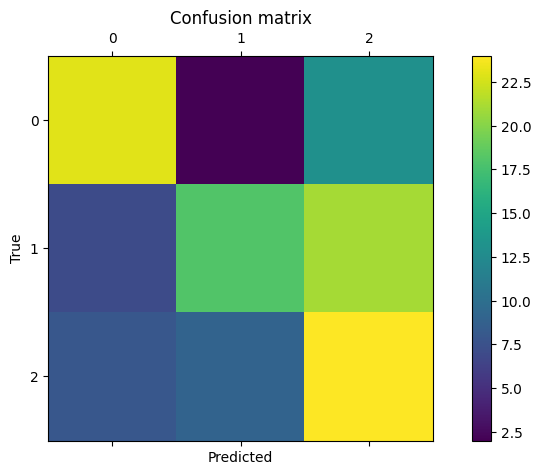

In [11]:
labels = [0, 1, 2]
y_pred = pipe.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=labels)
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
plt.title('Confusion matrix')
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [12]:
# taken from sklearn webpage
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer


class LemmaTokenizer:
    def __init__(self):
        self.wnl = WordNetLemmatizer()

    def __call__(self, doc):
        return [self.wnl.lemmatize(t) for t in word_tokenize(doc)]



In [13]:
import nltk
nltk.download('omw-1.4')
pipe[0].set_params(tokenizer=LemmaTokenizer())
get_accuracy()


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


0.576

In [14]:
tfidf_vectorizer = TfidfVectorizer()
pipe.steps[0] = ('vectorizer', tfidf_vectorizer)
get_accuracy()

0.568

In [15]:
ada_boost = AdaBoostClassifier()
pipe.steps[1] = ('adaboost', ada_boost)
get_accuracy()

0.552

In [18]:
count_vectorizer.get_feature_names

AttributeError: ignored

In [19]:
count_vectorizer = CountVectorizer()

bow = count_vectorizer.fit_transform(X_train)

words = count_vectorizer.get_feature_names()

p_value_limit = 0.95

dtf_features = pd.DataFrame()

for cat in range(3):
    _, p = chi2(bow, y_train == cat)
    dtf_features = dtf_features.append(pd.DataFrame(
        {"feature": words, "score": 1-p, "y": cat}))
    dtf_features = dtf_features.sort_values(["y", "score"],
                                            ascending=[True, False])
    dtf_features = dtf_features[dtf_features["score"] > p_value_limit]

X_names = dtf_features["feature"].unique().tolist()

pipe['vectorizer'].set_params(vocabulary=X_names)

get_accuracy()

AttributeError: ignored

In [20]:

mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                     mode='max', verbose=1, save_best_only=True)

In [23]:
def fit_sequential(X_train, X_test, sequential=None, epochs=20, patience=5):

    if sequential is None:
        input_size = X_train.shape[1]

        sequential = tf.keras.models.Sequential([
            tf.keras.layers.Flatten(input_shape=(input_size, )),
            tf.keras.layers.Dense(128),
            tf.keras.layers.Dropout(0.2),
            tf.keras.layers.Dense(3, activation='sigmoid')
        ])
        loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(
            from_logits=True)
        sequential.compile(optimizer='adam', loss=loss_fn,
                           metrics=['accuracy'])
        global mc
        mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy',
                             mode='max', verbose=1, save_best_only=True)

    es = EarlyStopping(monitor='val_accuracy', mode='max',
                       verbose=1, patience=patience)
    sequential.fit(X_train, np.array(y_train), epochs=epochs, verbose=1,
                   validation_data=(X_test, np.array(y_test)), callbacks=[es, mc])
    sequential.load_weights('best_model.h5')
    return sequential

In [24]:
vectorizer = TfidfVectorizer()
def convert_sparse_matrix_to_sparse_tensor(X):
    coo = X.tocoo()
    indices = np.mat([coo.row, coo.col]).transpose()
    return tf.sparse.reorder(tf.SparseTensor(indices, coo.data, coo.shape))
X_train_vectorized = vectorizer.fit_transform(X_train).toarray()
X_test_vectorized = vectorizer.transform(X_test).toarray()
sequential = fit_sequential(X_train_vectorized, X_test_vectorized)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 9/12 [=====================>........] - ETA: 0s - loss: 1.0892 - accuracy: 0.4028
Epoch 1: val_accuracy improved from -inf to 0.53600, saving model to best_model.h5
12/12 [==============================] - 1s 27ms/step - loss: 1.0817 - accuracy: 0.4370 - val_loss: 1.0701 - val_accuracy: 0.5360
Epoch 2/20
 9/12 [=====================>........] - ETA: 0s - loss: 0.9880 - accuracy: 0.7500
Epoch 2: val_accuracy improved from 0.53600 to 0.56000, saving model to best_model.h5
12/12 [==============================] - 0s 12ms/step - loss: 0.9820 - accuracy: 0.7399 - val_loss: 1.0420 - val_accuracy: 0.5600
Epoch 3/20
 1/12 [=>............................] - ETA: 0s - loss: 0.9292 - accuracy: 0.7812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 9/12 [=====================>........] - ETA: 0s - loss: 0.8914 - accuracy: 0.8056
Epoch 3: val_accuracy improved from 0.56000 to 0.56800, saving model to best_model.h5
12/12 [==============================] - 0s 13ms/step - loss: 0.8823 - accuracy: 0.8150 - val_loss: 1.0071 - val_accuracy: 0.5680
Epoch 4/20
11/12 [==========================>...] - ETA: 0s - loss: 0.7772 - accuracy: 0.8949
Epoch 4: val_accuracy improved from 0.56800 to 0.60800, saving model to best_model.h5
12/12 [==============================] - 0s 12ms/step - loss: 0.7782 - accuracy: 0.8928 - val_loss: 0.9617 - val_accuracy: 0.6080
Epoch 5/20
11/12 [==========================>...] - ETA: 0s - loss: 0.6685 - accuracy: 0.9432
Epoch 5: val_accuracy improved from 0.60800 to 0.62400, saving model to best_model.h5
12/12 [==============================] - 0s 12ms/step - loss: 0.6657 - accuracy: 0.9383 - val_loss: 0.9105 - val_accuracy: 0.6240
Epoch 6/20
 9/12 [=====================>........] - ETA: 0s - loss: 0.5580 - accu

# **Question 3: Create your own word embedding model**

(20 points). Use the data you collected for assignment two to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

In [25]:
class W2VTransformer(BaseEstimator, TransformerMixin):
    def __init__(self, size):
        self.size = size
        pass

    def fit(self, X, y=None):
        self.model = Word2Vec(min_count=1,
                              window=2,
                              size=self.size,
                              sample=6e-5,
                              alpha=0.03,
                              min_alpha=0.0007,
                              negative=20)
        sentences = [row.split() for row in X]

        self.model.build_vocab(sentences)
        self.model.train(
            sentences, total_examples=self.model.corpus_count, epochs=self.model.epochs)
        return self

    def get_vector(self, sentence):
        relevant_words_vectors = [self.model.wv[x]
                                  for x in sentence.split() if x in self.model.wv.vocab]
        if not relevant_words_vectors:
            return np.zeros(self.model.vector_size)  # .astype('float32')
        return np.mean(relevant_words_vectors, axis=0)

    def transform(self, X):
        arr = np.array([])
        for elem in X:
            arr = np.concatenate([arr, self.get_vector(elem)])
        return arr.reshape(-1, self.size)






In [30]:
vectorizer = W2VTransformer(4)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

TypeError: ignored

In [31]:

sequential = fit_sequential(X_train_vectorized, X_test_vectorized)

Epoch 1/20
11/12 [==========================>...] - ETA: 0s - loss: 1.0800 - accuracy: 0.4375
Epoch 1: val_accuracy improved from -inf to 0.45600, saving model to best_model.h5
12/12 [==============================] - 2s 52ms/step - loss: 1.0810 - accuracy: 0.4316 - val_loss: 1.0768 - val_accuracy: 0.4560
Epoch 2/20
11/12 [==========================>...] - ETA: 0s - loss: 0.9773 - accuracy: 0.7358
Epoch 2: val_accuracy improved from 0.45600 to 0.48800, saving model to best_model.h5
12/12 [==============================] - 0s 21ms/step - loss: 0.9778 - accuracy: 0.7292 - val_loss: 1.0462 - val_accuracy: 0.4880
Epoch 3/20
10/12 [========================>.....] - ETA: 0s - loss: 0.8923 - accuracy: 0.8281
Epoch 3: val_accuracy improved from 0.48800 to 0.55200, saving model to best_model.h5
12/12 [==============================] - 0s 21ms/step - loss: 0.8851 - accuracy: 0.8365 - val_loss: 1.0105 - val_accuracy: 0.5520
Epoch 4/20
10/12 [========================>.....] - ETA: 0s - loss: 0.786

In [32]:
pca = PCA(n_components=2)
X_train_vectorized_2d = pca.fit_transform(X_train_vectorized)

In [33]:
plt.figure(figsize=(14, 8))
_ = sns.scatterplot(
    X_train_vectorized_2d[:, 0], X_train_vectorized_2d[:, 1], hue=y_train)

TypeError: ignored

<Figure size 1400x800 with 0 Axes>

# **Question 4: Create your own training and evaluation data for sentiment analysis**

(15 points). **You dodn't need to write program for this question!** Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral). Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew. This datset will be used for assignment four: sentiment analysis and text classification.


In [34]:
model_class, tokenizer_class, pretrained_weights = (
    transformers.DistilBertModel, transformers.DistilBertTokenizer, 'distilbert-base-uncased')
tokenizer = tokenizer_class.from_pretrained(pretrained_weights)
model = model_class.from_pretrained(pretrained_weights)



tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

In [35]:
def get_vectors():
    start = time.time()
    k = 1000
    for i in range(0, len(all_sentences), k):
        with torch.no_grad():
            last_hidden_states = model(
                input_ids[i:i+k], attention_mask=input_ids[i:i+k])
        vectors = np.concatenate([vectors, last_hidden_states[0].numpy(
        )[:, 0, :]]) if i > 0 else last_hidden_states[0].numpy()[:, 0, :]
    return vectors

In [36]:
sequential = fit_sequential(X_train_vectorized, X_test_vectorized, epochs=10)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


 8/12 [===================>..........] - ETA: 0s - loss: 1.0879 - accuracy: 0.4023
Epoch 1: val_accuracy improved from -inf to 0.41600, saving model to best_model.h5
12/12 [==============================] - 1s 31ms/step - loss: 1.0795 - accuracy: 0.4450 - val_loss: 1.0785 - val_accuracy: 0.4160
Epoch 2/10
 8/12 [===================>..........] - ETA: 0s - loss: 0.9785 - accuracy: 0.7734
Epoch 2: val_accuracy improved from 0.41600 to 0.49600, saving model to best_model.h5
12/12 [==============================] - 0s 13ms/step - loss: 0.9780 - accuracy: 0.7480 - val_loss: 1.0491 - val_accuracy: 0.4960
Epoch 3/10


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 8/12 [===================>..........] - ETA: 0s - loss: 0.8808 - accuracy: 0.8242
Epoch 3: val_accuracy improved from 0.49600 to 0.52000, saving model to best_model.h5
12/12 [==============================] - 0s 13ms/step - loss: 0.8762 - accuracy: 0.8097 - val_loss: 1.0134 - val_accuracy: 0.5200
Epoch 4/10
 9/12 [=====================>........] - ETA: 0s - loss: 0.7811 - accuracy: 0.8646
Epoch 4: val_accuracy improved from 0.52000 to 0.59200, saving model to best_model.h5
12/12 [==============================] - 0s 14ms/step - loss: 0.7682 - accuracy: 0.8820 - val_loss: 0.9664 - val_accuracy: 0.5920
Epoch 5/10
10/12 [========================>.....] - ETA: 0s - loss: 0.6646 - accuracy: 0.9156
Epoch 5: val_accuracy improved from 0.59200 to 0.60000, saving model to best_model.h5
12/12 [==============================] - 0s 13ms/step - loss: 0.6520 - accuracy: 0.9196 - val_loss: 0.9177 - val_accuracy: 0.6000
Epoch 6/10
10/12 [========================>.....] - ETA: 0s - loss: 0.5431 - accu

In [37]:
vectorizer = W2VTransformer(4)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)
sequential = fit_sequential(X_train_vectorized, X_test_vectorized)
mapper = {0: "negative", 1: "neutral", 2: "positive"}


def get_sentiment(model, vectorizer, mapper, text):
    return mapper.get(np.argmax(max(model.predict(vectorizer.transform(pd.Series([text]))))))

TypeError: ignored

In [38]:

get_sentiment(sequential, vectorizer, mapper, "The new big one is huge")

NameError: ignored